## In this project, I am going to be building a Neural Network Model based off of a historical Lending Tree dataset. Lending Tree is a website where individuals can lend another person money and get paid back with added interest.

## This is REAL data. The goal of this deep-learning model is to determine if the borrower will pay back their loan.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
info = pd.read_csv('lending_club_info.csv')

In [ ]:
info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [ ]:
df = pd.read_csv('lending_club_loan_two.csv')

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

([<matplotlib.patches.Wedge at 0x7f6816ccd760>,
 [Text(-0.8977154577415746, 0.6356940749541681, 'Fully Paid Off'),
  Text(0.8977154577415741, -0.6356940749541686, 'Default')])

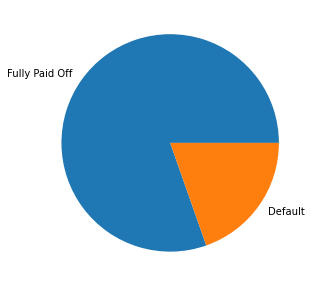

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df['loan_status'].value_counts(),labels = ['Fully Paid Off','Default'])


#### There are a lot of null values. I will start with feature engineeering for my model while also doing exploritory data analysis

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

### Employee Length

In [ ]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

#### For these values to be used in the model/exploritory data analysis, we will extract the numerical value using the method described in this stack overflow post: https://stackoverflow.com/questions/37683558/pandas-extract-number-from-string

#### Note: we will treat 10+ years of employment as 10 years and <1 year of employment as 1 year

In [ ]:
df['emp_length'] = df['emp_length'].str.extract('(\d+)')

In [ ]:
df['emp_length'] = df['emp_length'].astype('float64')

#### Now the issue becomes how we are going to treat the null values. Number of years employeed should be a strong indication on loan being paid back. Let's use visualization tools to see if that's the case

Text(0, 0.5, 'Count')

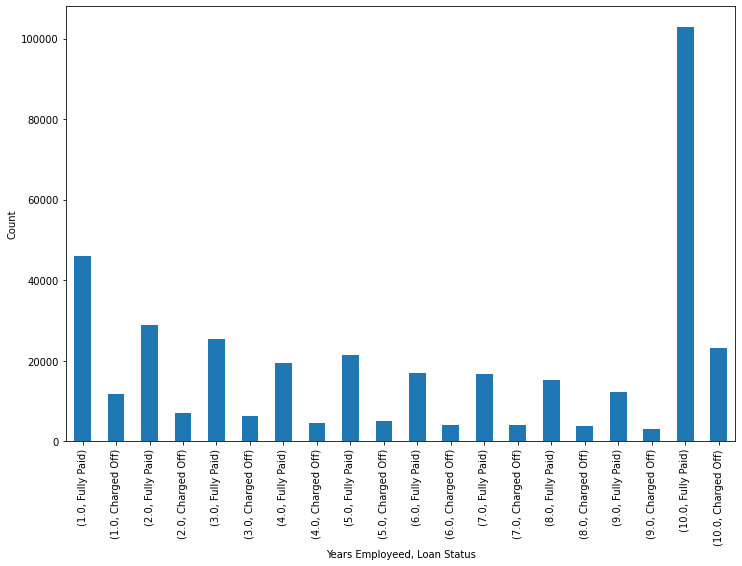

In [ ]:
plt.figure(figsize=(12,8))

df.groupby('emp_length')['loan_status'].value_counts().plot(kind='bar')

plt.xlabel('Years Employeed, Loan Status')
plt.ylabel('Count')

#### This visual doesn't do a great job of telling me if there is a trend in number of years worked vs. loan status. I think the best way to determine this would be creating a ratio for the years worked/loan status

In [ ]:
df.groupby('emp_length')['loan_status'].value_counts()

emp_length  loan_status
1.0         Fully Paid      45890
            Charged Off     11717
2.0         Fully Paid      28903
            Charged Off      6924
3.0         Fully Paid      25483
            Charged Off      6182
4.0         Fully Paid      19344
            Charged Off      4608
5.0         Fully Paid      21403
            Charged Off      5092
6.0         Fully Paid      16898
            Charged Off      3943
7.0         Fully Paid      16764
            Charged Off      4055
8.0         Fully Paid      15339
            Charged Off      3829
9.0         Fully Paid      12244
            Charged Off      3070
10.0        Fully Paid     102826
            Charged Off     23215
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='emp_length'>

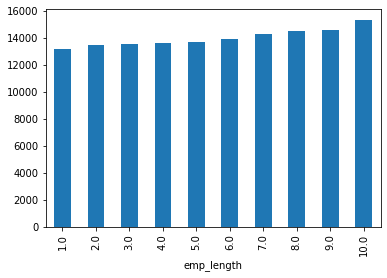

In [ ]:
df.groupby('emp_length')['loan_amnt'].mean().plot(kind='bar')

#### I do not find it useful to factor in the employment length in this model due to the large amount of null values and limited correlation between the ratio of loan status by years employeed. For this reason, I will drop the years employeed column for the model 

In [ ]:
df = df.drop('emp_length',axis=1)

### Employee Title

#### There are thousands of job titles. It would not make sense to assign indexes to each job without messing up the model. 

#### We will drop the emp_title column

In [ ]:
df = df.drop('emp_title',axis=1)

### Title Column

In [ ]:
df['title'].nunique()

48817

In [ ]:
# 48,000 unique reasons the individual is requesting a loan. This will involve a significant amount of computing power to catogorize and ultimently run a model. 
## for this reason, I will drop the title column

df = df.drop('title',axis=1)

### Revol Util Column

In [ ]:
info.iloc[22][1]

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [ ]:
# filling null values with the average. Because there are a low amount of null values in this column, this is something we can do with confidence

In [ ]:
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())

### Mort_Acct column

In [ ]:
df['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [ ]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
# If the field value is null, we are going to assume that the individual has zero mortgage accounts

In [ ]:
df['mort_acc'] = df['mort_acc'].fillna(0)

### Public Record Bankrupcies Column

In [ ]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [ ]:
# Will fill 535 null entries with zero (0) public record bankruptcies

In [ ]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)

### All null values should be removed. Let's double check

In [ ]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

### Converting object data types to an int

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  object 
 14  open_acc              396030 non-null  float64
 15  

### Grade and Subgrade Columns

<AxesSubplot:xlabel='grade'>

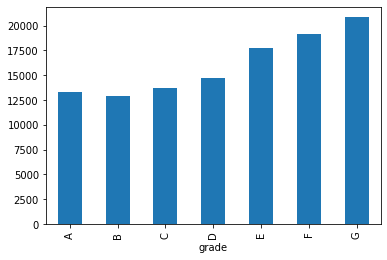

In [ ]:
df.groupby('grade')['loan_amnt'].mean().plot(kind='bar')

<AxesSubplot:xlabel='grade'>

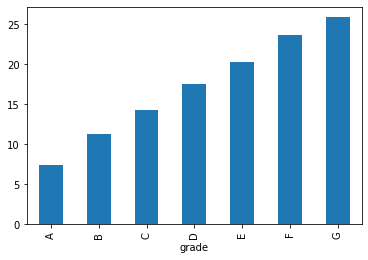

In [ ]:
df.groupby('grade')['int_rate'].mean().plot(kind='bar')

<AxesSubplot:xlabel='grade,loan_status'>

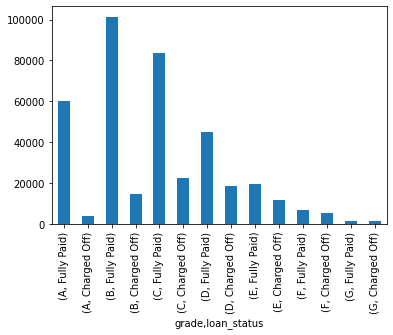

In [ ]:
df.groupby('grade')['loan_status'].value_counts().plot(kind='bar')

In [ ]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [ ]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

#### The below graph shows the ratio between sub grade and the ratio between fully paid off loan vs charged off (defaulted)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

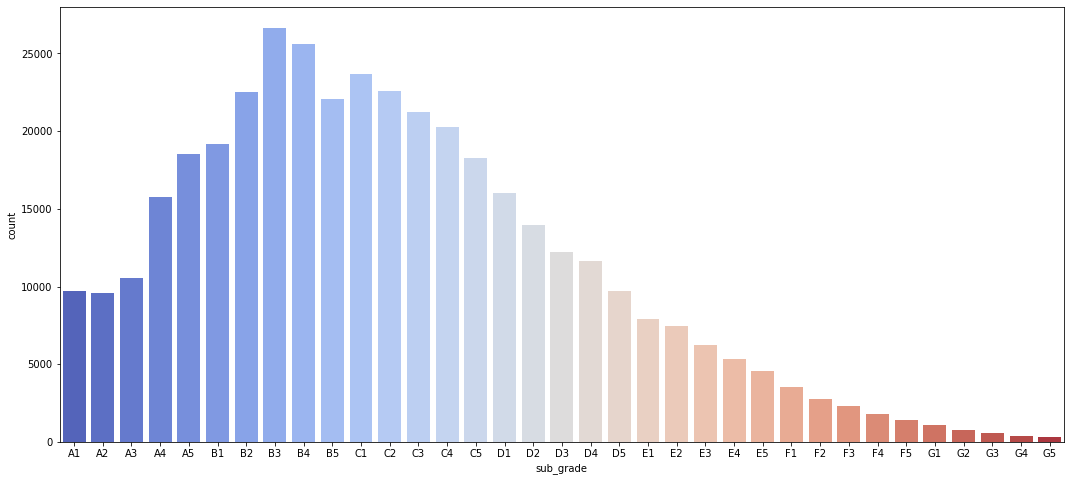

In [ ]:
plt.figure(figsize=(18,8))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

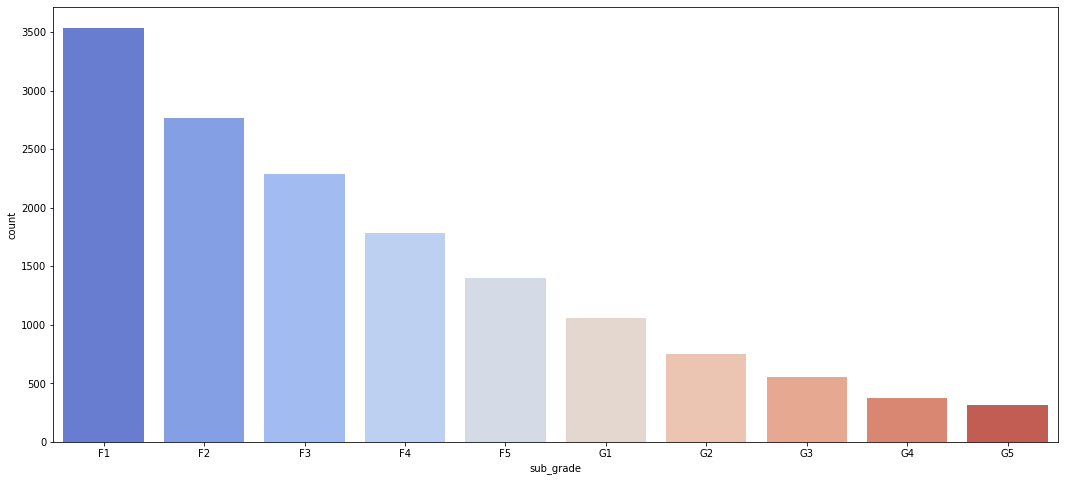

In [ ]:
f_and_g = df[(df['grade'] == 'G') | (df['grade'] == 'F')]

plt.figure(figsize=(18,8))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order=subgrade_order,palette='coolwarm')

## Assigning dummy variables to sub grade column then dropping the text columns (grade and sub-grade)

In [ ]:
dummy_subgrade = pd.get_dummies(df['sub_grade'])

In [ ]:
df = df.append(dummy_subgrade)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[['A1', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5']] = df[['A1', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5']].fillna(0)

In [ ]:
df = df.drop('grade',axis=1)
df = df.drop('sub_grade',axis=1)

In [ ]:
df = df.dropna()

### Taking a look at the term column

<AxesSubplot:xlabel='term'>

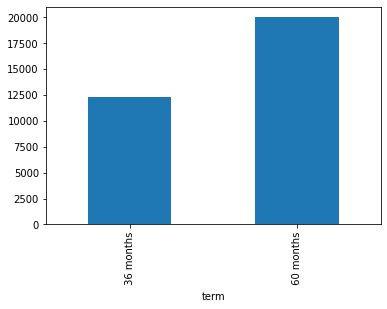

In [ ]:
df.groupby('term')['loan_amnt'].mean().plot(kind='bar')

<AxesSubplot:xlabel='term,loan_status'>

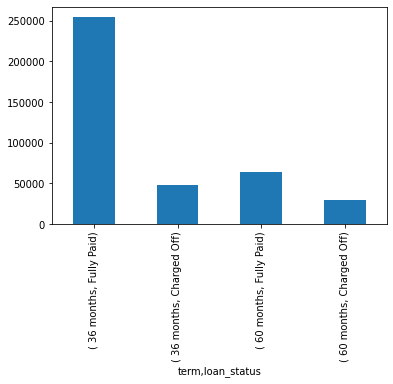

In [ ]:
df.groupby('term')['loan_status'].value_counts().plot(kind='bar')

#### This shows a significant correlation to loan amount and loan status. Going to make a new column called loan_length with only the numerical values using the same method as previous

In [ ]:
df['loan_length'] = df['term'].str.extract('(\d+)')

In [ ]:
df['loan_length'] = df['loan_length'].astype('float64')

In [ ]:
df = df.drop('term',axis=1)

### Changing Loan Status to 0 for Charged Off and 1 for fully paid

In [ ]:
df['loan_status'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

### Verification Status Column

In [ ]:
df['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

<AxesSubplot:xlabel='verification_status', ylabel='count'>

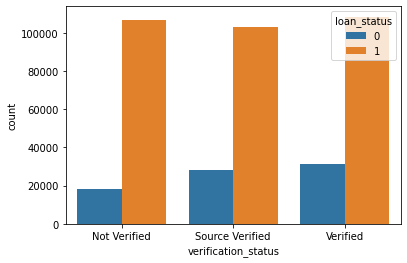

In [ ]:
sns.countplot(x='verification_status',data=df,hue='loan_status')

In [ ]:
df['verification_status'] = df['verification_status'].map({'Not Verified':0, 'Source Verified':1,'Verified':2})

#### Dropping purpose column due to the high number of unique values

In [ ]:
df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'loan_length'],
      dtype='object')

In [ ]:
df = df.drop('purpose',axis=1)

#### Looking at issue_d column (Issue Date). Let's extract the year to see if the year the loan the individual took out has anything to do with if it's paid back or not

In [ ]:
df['issue_d'] = df['issue_d'].str.extract('(\d+)')

In [ ]:
df['issue_d'] = df['issue_d'].astype('float64')

<AxesSubplot:xlabel='issue_d', ylabel='count'>

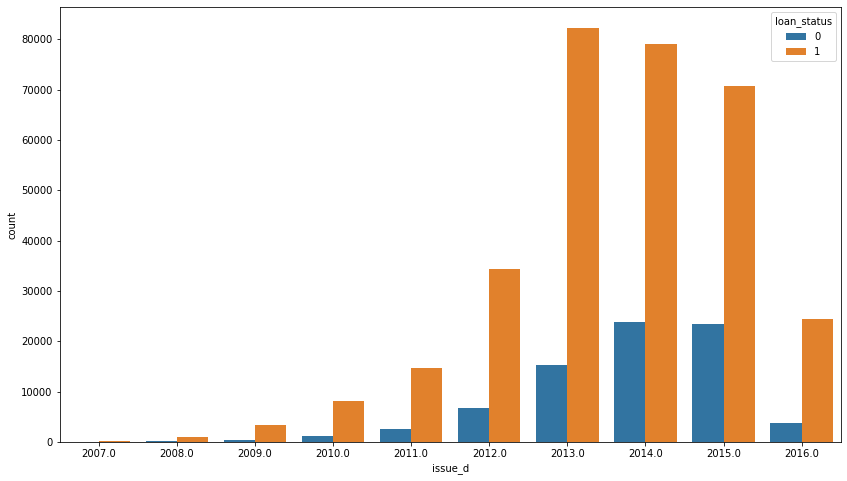

In [ ]:
plt.figure(figsize=(14,8))

sns.countplot(x='issue_d',data=df,hue='loan_status')

### Looks like this will not be particularily useful in the model

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

#### Looking at home ownership next

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

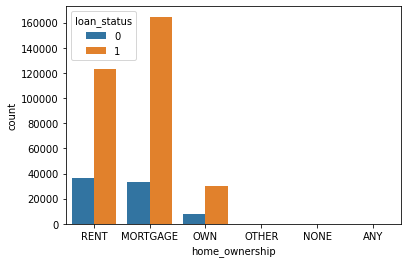

In [ ]:
sns.countplot(x='home_ownership',data=df,hue='loan_status')

#### Appears as though those who rented defaulted at a higher rate than those who bought a house/condo/appt

In [ ]:
df['home_ownership'] = df['home_ownership'].map({'NONE':0, 'OTHER':1,'ANY':2,'RENT':3,'MORTGAGE':4,'OWN':5})

#### Dropping the address column

In [ ]:
df = df.drop('address',axis=1)

### For the sake of time I've analyzed the correlation through countplots below. Ultimately I decided to drop the following columns: earliest_cr_line, initial_list_status, application_type

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

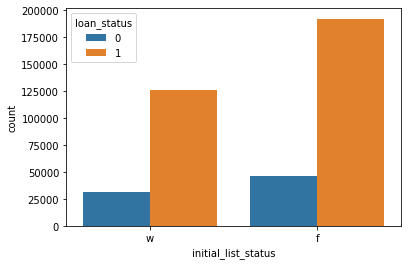

In [ ]:
sns.countplot('initial_list_status',data=df,hue='loan_status')

In [ ]:
df = df.drop('earliest_cr_line',axis=1)
df = df.drop('initial_list_status',axis=1)
df = df.drop('application_type',axis=1)

## Final step is balancing the dataset. I'm going to drop a random amount of fully paid off columns to even out with the default columns

In [ ]:
df['loan_status'].value_counts()

1    318357
0     77673
Name: loan_status, dtype: int64

In [ ]:
total = df['loan_status'].value_counts()[0]

In [ ]:
bal_df = df[df['loan_status'] == 1].sample(n=total)

In [ ]:
bal_df = bal_df.append(df[df['loan_status']==0])

In [ ]:
df = bal_df

In [ ]:
df['loan_status'].value_counts()

1    77673
0    77673
Name: loan_status, dtype: int64

#### Now we have ALL numerical columns with no nulls! Time to start our ANN modeling!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('loan_status',axis=1).values
y = df['loan_status'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df.shape

(155346, 52)

In [ ]:
# Dropping out neurons

from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(52,activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(26,activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(13,activation='relu'))
model.add(Dropout(rate=0.2))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [ ]:
model.fit(x=X_train,y=y_train,epochs=500,batch_size=256,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/500
486/486 [==============================] - 3s 4ms/step - loss: 0.6562 - val_loss: 0.6371
Epoch 2/500
486/486 [==============================] - 2s 4ms/step - loss: 0.6389 - val_loss: 0.6330
Epoch 3/500
486/486 [==============================] - 2s 3ms/step - loss: 0.6364 - val_loss: 0.6314
Epoch 4/500
486/486 [==============================] - 2s 4ms/step - loss: 0.6351 - val_loss: 0.6304
Epoch 5/500
486/486 [==============================] - 3s 5ms/step - loss: 0.6342 - val_loss: 0.6294
Epoch 6/500
486/486 [==============================] - 2s 4ms/step - loss: 0.6333 - val_loss: 0.6298
Epoch 7/500
486/486 [==============================] - 2s 4ms/step - loss: 0.6327 - val_loss: 0.6286
Epoch 8/500
486/486 [==============================] - 2s 3ms/step - loss: 0.6321 - val_loss: 0.6281
Epoch 9/500
486/486 [==============================] - 2s 4ms/step - loss: 0.6318 - val_loss: 0.6269
Epoch 10/500
486/486 [==============================] - 2s 3ms/step - loss: 0.6310 - val_lo

In [ ]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

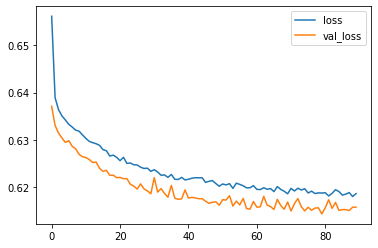

In [ ]:
model_loss.plot()

In [ ]:
predictions = (model.predict(X_test)>0.5).astype(int)


971/971 [==============================] - 1s 1ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[11074  4501]
 [ 6146  9349]]


              precision    recall  f1-score   support

           0       0.64      0.71      0.68     15575
           1       0.68      0.60      0.64     15495

    accuracy                           0.66     31070
   macro avg       0.66      0.66      0.66     31070
weighted avg       0.66      0.66      0.66     31070



In [ ]:
default = round(abs(100*(1-(confusion_matrix(y_test,predictions)[0][1] / confusion_matrix(y_test,predictions)[0][0]))),0)
paid_perc = round(abs(100*(1-(confusion_matrix(y_test,predictions)[1][1] / confusion_matrix(y_test,predictions)[1][0]))),0)

In [ ]:
print('When predicting if an individual would default on their loan, the model was correct',default,'% of the time')
print('\n')
print('When predicting if an individual would pay back their loan, the model was correct',paid_perc,'% of the time')

When predicting if an individual would default on their loan, the model was correct 59.0 % of the time


When predicting if an individual would pay back their loan, the model was correct 52.0 % of the time


### This initial model predicted correctly 66% of the time. By balancing the dataset, the model was better at determining if an individual would pay back their loan

# 2nd Try at building model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('lending_club_loan_two.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
df = df.drop('emp_title',axis=1)

In [ ]:
df = df.drop('emp_length',axis=1)

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
df = df.drop('title',axis=1)

In [ ]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [ ]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

In [ ]:
def fill_mort_acc(total_acc,mort_acc):
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else:
    return mort_acc

In [ ]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [ ]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [ ]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [ ]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [ ]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

In [ ]:
df = df.drop('grade',axis=1)

In [ ]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [ ]:
dummies

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [ ]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [ ]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

df = pd.concat([df.drop(['home_ownership'],axis=1),dummies],axis=1)

In [ ]:
df['zip_code'] = df['address'].apply(lambda x: int(x[-5:]))

In [ ]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)

df = pd.concat([df.drop(['zip_code'],axis=1),dummies],axis=1)

In [ ]:
df = df.drop('address',axis=1)

In [ ]:
df = df.drop('issue_d',axis=1)

In [ ]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

In [ ]:
df = df.drop('loan_status',axis=1)

In [ ]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

### preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('loan_repaid',axis=1).values

In [ ]:
y = df['loan_repaid'].values

In [ ]:
print(len(df))

395219


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

(316175, 78)

In [ ]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.3010 - val_loss: 0.2642
Epoch 2/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2653 - val_loss: 0.2631
Epoch 3/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2626 - val_loss: 0.2622
Epoch 4/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2616 - val_loss: 0.2621
Epoch 5/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2609 - val_loss: 0.2619
Epoch 6/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2604 - val_loss: 0.2616
Epoch 7/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2598 - val_loss: 0.2612
Epoch 8/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2595 - val_loss: 0.2614
Epoch 9/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2592 - val_loss: 0.2614
Epoch 10/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.258

In [ ]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

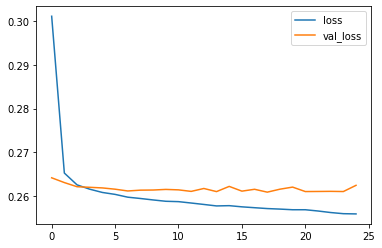

In [ ]:
losses.plot()

In [ ]:
predictions = (model.predict(X_test)>0.5).astype(int)

2471/2471 [==============================] - 3s 1ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 6842  8816]
 [  109 63277]]


              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [ ]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))